# User guide for MORE-Q dataset
This Jupyter-notebook file contains the following content:
1. How to extract data from the original MORE-Q-G1, MORE-Q-G2, MORE-Q-G3 HDF5 files.
2. How to reproduce the figures technical validation in the manuscript. 
3. Some other example for using the MORE-Q dataset e.g. Person correlation

In [136]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
import seaborn as sns
import numpy as np
from joblib import delayed, Parallel 

#For PCA
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

# Data extraction from HDF5 into Pandas Dataframe
To extract the HDF5s into .joblib files, we offer the __createDF.py__ script. 

please make sure that the createDF.py script, this jupyter-notebook file and the HDF5 files in the same folder. 

One can run createDF.py both in the terminal by 

__python createDF.py -ds 'all'__  

or directly in this jupyternotebook by 

__%run createDF.py -ds 'all'__ 

In the above two cases, all the data will be extracted into DataFrame. For a special subset generation, please type __python createDF.py -h__ or __%run createDF.py -h__ for guidance.

For more details, one can also refer to the dataset repository page __10.5281/zenodo.13741196__ on the Zenodo.

In [2]:
#For example, to make joblib files of the whole datasets 
%run createDF.py -ds 'all'

All subsets will be printed


100%|██████████| 102/102 [00:01<00:00, 82.93it/s]


G1_OM printed


100%|██████████| 18/18 [00:00<00:00, 92.47it/s]


G1_REC printed


100%|██████████| 18/18 [03:45<00:00, 12.52s/it]


G2_XTB_REC printed


100%|██████████| 18/18 [02:31<00:00,  8.39s/it]


G2_XTB_OM printed


100%|██████████| 18/18 [02:43<00:00,  9.10s/it]


G2_XTB_DM printed


100%|██████████| 18/18 [00:23<00:00,  1.30s/it]


G2_XTB_ORCA_OM printed


100%|██████████| 18/18 [00:22<00:00,  1.25s/it]


G2_XTB_ORCA_REC printed


100%|██████████| 18/18 [00:20<00:00,  1.12s/it]


G2_XRB_ORCA_DM printed


100%|██████████| 20/20 [00:34<00:00,  1.71s/it]


G3_VASP_CPLX printed


100%|██████████| 20/20 [00:36<00:00,  1.84s/it]


G3_VASP_OM printed


100%|██████████| 20/20 [00:34<00:00,  1.70s/it]


G3_VASP_SUB printed


100%|██████████| 8/8 [00:13<00:00,  1.63s/it]


G3_VASP_BD printed
All subsets printed


In [4]:
#To ask for a quick help
%run createDF.py -h

usage: createDF.py [-h] [-ds DS]

to obtain dataset

optional arguments:
  -h, --help  show this help message and exit
  -ds DS      Type anyone of the following: 'G1_OM', 'G2_REC', 'G2_XTB_OM',
              'G2_XTB_REC', 'G2_XTB_DM', 'G2_XTB_ORCA_OM', 'G2_XTB_ORCA_REC',
              'G2_XTB_ORCA_DM', 'G3_VASP_CPLX', 'G3_VASP_OM', 'G3_VASP_SUB',
              or type 'all' to produce all the DF files


# Reproduction the technical validation figures

In [7]:
#read the produced datasets
#complex system 
CPLX_VASP_df = load('G3_VASP_CPLX.joblib')
SUB_VASP_df = load('G3_VASP_SUB.joblib')
OM_VASP_df = load('G3_VASP_OM.joblib')
BD_VASP_df = load('G3_VASP_BD.joblib')
#Monomer 
OM_df = load('G1_OM.joblib')
REC_df = load('G1_REC.joblib')
#XTB dimer 
XTB_df_OM = load('G2_XTB_OM.joblib')
XTB_df_REC = load('G2_XTB_REC.joblib') 
XTB_df_DM = load('G2_XTB_DM.joblib')
#ORCA dimer 
XTB_ORCA_df_OM = load('G2_XTB_ORCA_OM.joblib')
XTB_ORCA_df_REC = load('G2_XTB_ORCA_REC.joblib')
XTB_ORCA_df_DM = load('G2_XTB_ORCA_DM.joblib')

In [8]:
#shallow copy the df for invariable
#monomer by orca
df_rec = REC_df.copy()
df_om = OM_df.copy()
#dimer by orca
df_dm_om_orca = XTB_ORCA_df_OM.copy()
df_dm_rec_orca = XTB_ORCA_df_REC.copy()
df_dm_orca = XTB_ORCA_df_DM.copy()
#dimer by xtb
df_dm_om_xtb = XTB_df_OM.copy()
df_dm_rec_xtb = XTB_df_REC.copy()
df_dm_xtb = XTB_df_DM.copy()
#cplx by vasp
df_cplx = CPLX_VASP_df.copy()
df_sub = SUB_VASP_df.copy()
df_bd = BD_VASP_df.copy()
df_om_vasp = OM_VASP_df.copy()

In [9]:
#Color map
colors = {'black':'#0A0908','blue':'#22333B','white':'#EAE0D5','green':'#C6AC8F','brown':'#5E503F','yellow':'#FFBA08'}

## Dimer PCA and binding energy distribution

In [10]:
#To get the labels of the xTB properties
df_dm_xtb.columns

Index(['REC', 'OM', 'DM', 'atNUM', 'atXYZ', 'eXTB+D4', 'eSCC', 'eREP', 'eIE',
       'eAE', 'eAXC', 'eD4', 'eH', 'eL', 'HLgap', 'eORB', 'eAT', 'ACN',
       'muCHG', 'atC6', 'atPOL', 'mC6', 'mC8', 'mPOL', 'DIP', 'vDIP', 'QP',
       'eBIND'],
      dtype='object')

In [23]:
#To extract the global properties of the 23,838 dimers by xTB
xtb_labels = ['eXTB+D4', 'eSCC', 'eREP', 'eIE',
       'eAE', 'eAXC', 'eD4', 'eH', 'eL', 'HLgap','eAT','mC6', 'mC8', 'mPOL', 'DIP',
       'eBIND']
X = df_dm_xtb.copy()[xtb_labels]

In [24]:
X

,eXTB+D4,eSCC,eREP,eIE,eAE,eAXC,eD4,eH,eL,HLgap,eAT,mC6,mC8,mPOL,DIP,eBIND
0,-2606.09877,-2643.249774,37.14615,4.087156,-0.049237,0.787903,-1.8297,-10.227696,-7.620917,2.606779,506.592765,40473.354756,971452.592877,314.076278,6.251,-0.46711362755547725
1,-2606.036624,-2643.22778,37.175361,4.090277,0.009151,0.78887,-1.831819,-10.361274,-7.77912,2.582154,506.530619,40465.71963,971371.482335,314.060654,4.05,-0.3879487007721423
2,-2605.952606,-2643.141364,37.167881,4.067346,0.042214,0.791094,-1.854674,-10.146937,-7.287234,2.859703,506.446601,40478.757826,971426.743748,314.114345,4.789,-0.3012621999141629
3,-3521.956817,-3572.906174,50.841994,4.787698,0.045335,1.18589,-2.729687,-10.011412,-6.670704,3.340708,707.073028,78068.380956,1837574.914431,433.440858,3.842,-0.7487385574656855
4,-3521.923226,-3572.824827,50.828731,4.795699,0.073313,1.181302,-2.712363,-10.148949,-6.680567,3.468381,707.039437,78097.984583,1837713.273167,433.518775,5.026,-0.6521845782899618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23833,-4834.574247,-4905.203064,70.565897,6.068759,-0.070462,1.691886,-3.923336,-9.447587,-7.82169,1.625896,956.898627,152363.554021,3810944.689238,616.205953,11.305,-0.3969487493483257
23834,-4834.487212,-4905.107668,70.534594,6.020792,-0.057471,1.692383,-3.944849,-9.671147,-7.730884,1.940263,956.811591,152365.839834,3811193.8719,616.229616,6.878,-0.30494049055846517
23835,-4519.033928,-4583.850118,64.782089,5.467142,-0.103765,1.584643,-3.622845,-9.572261,-7.714699,1.857563,899.053027,134185.887871,3316175.764639,574.904812,6.124,-0.4487940128971104
23836,-4518.929003,-4583.785501,64.81936,5.453187,-0.035653,1.582522,-3.659765,-9.520581,-7.722589,1.797992,898.948102,134188.184998,3315905.729935,574.921622,6.309,-0.34127701207739847


In [58]:
#define functons to get PCA
#PCA
def get_pca(X):
    #results: pca of X and components and eigenvalues
    pca = PCA()
    X_std = StandardScaler().fit_transform(X) 
    X_2d = pca.fit_transform(X_std)
    X_pca = pd.DataFrame(X_2d)
    #X_pca.index = label
    X_pca.columns = ['PC{}'.format(i+1) for i in X_pca.columns]
    var = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=3)*100)
    var_sep=np.round(pca.explained_variance_ratio_,decimals=3)*100
    fig = plt.figure(figsize=(8,7))
    plt.scatter(range(len(var)),var)
    plt.xticks(ticks=[i for i in (range(len(var)))],labels=[i+1 for i in range(len(var))])
    #plt.scatter(range(0,len(range(var))),var)
    plt.ylabel('% Explained vairance ratio',fontsize=20)
    plt.xlabel('Principal Component (PC)',fontsize=20)
    plt.axis('on')
    plt.tick_params('both',width=2,labelsize=20)
    plt.tight_layout()
    print('cumulat:',var)
    print('var_sep:',var_sep)
    #print('pca_componets:')
    #plt.savefig('./variance.png',dpi=300)
    return X_pca*-1,pca.components_ * -1,var_sep
def get_X_pca_normalized(X_pca):
    #此处只归一化了三处PC
    _ = X_pca.copy()
    scale1 = 1.0/(max(X_pca['PC1']) - min(X_pca['PC1']))
    scale2 = 1.0/(max(X_pca['PC2']) - min(X_pca['PC2']))
    scale3 = 1.0/(max(X_pca['PC3']) - min(X_pca['PC3']))
    _['PC1_normalized'] = [i*scale1 for i in X_pca['PC1']]
    _['PC2_normalized'] = [i*scale2 for i in X_pca['PC2']]
    _['PC3_normalized'] = [i*scale3 for i in X_pca['PC3']]
    return _[['PC1_normalized','PC2_normalized','PC3_normalized']]
def get_eigenval_weight(X,PC):
    fig,ax = plt.subplots(2,1,figsize=(8,7))
    #pc1
    ax[0].bar(range(len(PC[0])),PC[0])
    ax[0].set_xticklabels(X.columns,fontsize=10) 
    # how to set the interval for xitcks?
    from matplotlib.pyplot import MultipleLocator
    x_major_locator=MultipleLocator(1)
    ax[0].xaxis.set_major_locator(x_major_locator) #what does this do? to set the interval
    ax[0].set_ylim(-0.6,0.6)
    ax[0].set_xticklabels([])
    ax[0].set_ylabel('PC1 weight',fontsize=20)
    ax[0].set_xticks(range(len(PC[0])))
    
    #pc2
    ax[1].xaxis.set_major_locator(x_major_locator)
    ax[1].bar(range(len(PC[1])),PC[1])
    ax[1].set_xticklabels(X.columns,fontsize=20,rotation=90) 
    ax[1].set_ylim(-0.6,0.6)
    ax[1].set_ylabel('PC2 weight',fontsize=20)
    #how to set the interval for xitcks?
    from matplotlib.pyplot import MultipleLocator
    x_major_locator=MultipleLocator(1)
    ax[1].set_xticks(range(len(PC[0])))
    #what does this do? to set the interval
    plt.subplots_adjust(hspace=0.1)
    plt.tight_layout()
    #plt.savefig('../Dataset/PCA_weights.png',dpi=300)

cumulat: [62.8 77.  84.8 90.3 94.8 98.3 99.6 99.8 99.9 99.9 99.9 99.9 99.9 99.9
 99.9 99.9]
var_sep: [62.8 14.2  7.8  5.5  4.5  3.5  1.3  0.2  0.1  0.   0.   0.   0.   0.
  0.   0. ]


/tmp/ipykernel_1576062/3063157714.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(X.columns,fontsize=10)
/tmp/ipykernel_1576062/3063157714.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(X.columns,fontsize=20,rotation=90)


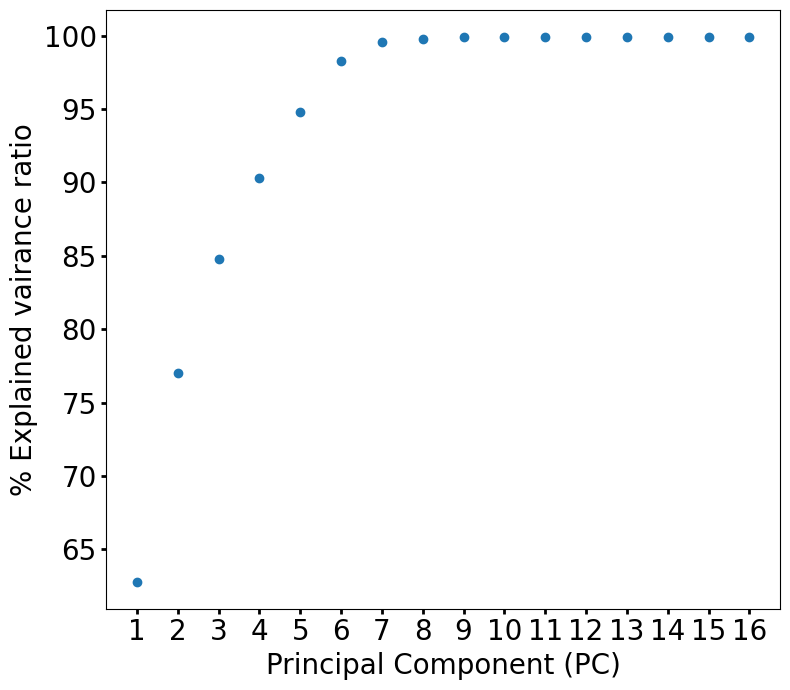

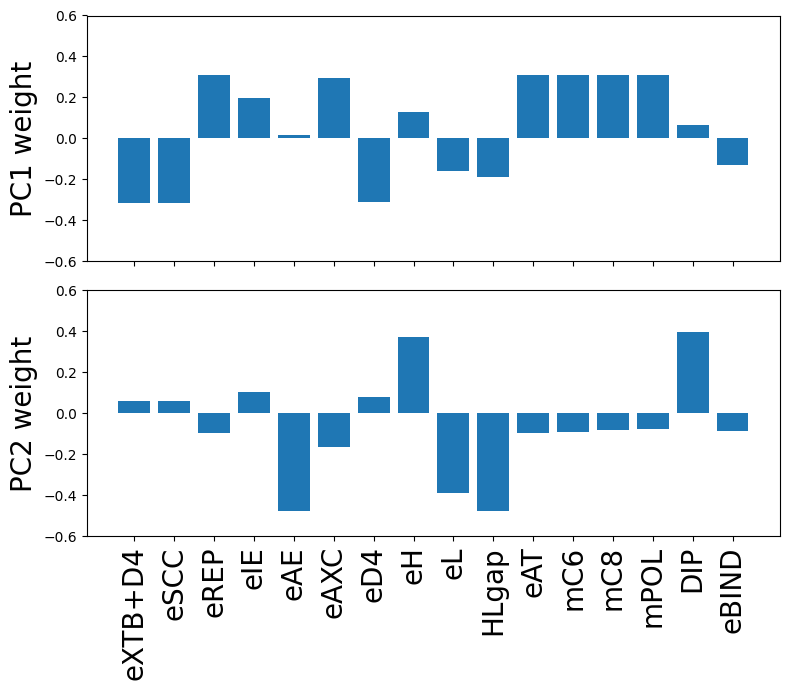

In [59]:
#To get the Principal components
X_pca, PC, var_sep= get_pca(X)
get_eigenval_weight(X,PC)
X_pca_norm = get_X_pca_normalized(X_pca)

In [60]:
#To obtain the 1,836 most stable configurations' labels
labels_1836_DM = df_dm_orca[['REC','OM','DM']]
labels_23838_DM = df_dm_xtb[['REC','OM','DM']]
labels_23838_DM = pd.concat([labels_23838_DM,pd.DataFrame(labels_23838_DM.index,index=None)],axis=1)
merged_ = pd.merge(labels_23838_DM,labels_1836_DM,on=['REC','OM','DM'],how='inner',indicator=True)
selected_labels = list(merged_[0])

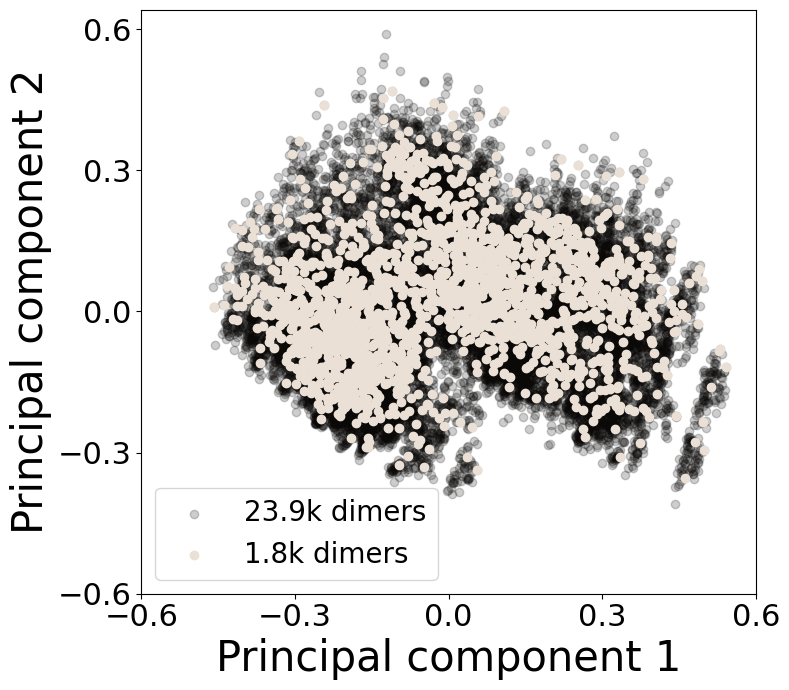

In [102]:
# To get the PCA 
fig,ax = plt.subplots(figsize=(8,7))
ax.scatter(X_pca_norm[['PC1_normalized']],X_pca_norm[['PC2_normalized']],color=colors['black'],label='23.9k dimers',alpha=0.2)
ax.scatter(X_pca_norm.loc[selected_labels,'PC1_normalized'],X_pca_norm.loc[selected_labels,'PC2_normalized'],color=colors['white'],alpha=1,label='1.8k dimers')
ax.set_xticks(np.arange(-0.6,0.7,0.3))
ax.set_yticks(np.arange(-0.6,0.7,0.3))
#ax.set_xticks([])
#ax.set_yticks([])
ax.set_xlabel('Principal component 1',fontsize=30)
ax.set_ylabel('Principal component 2',fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc='lower left',fontsize=20)
plt.tight_layout()
#plt.savefig('../Dataset/xTB_PCA_cluster.png',dpi=600)
plt.show()


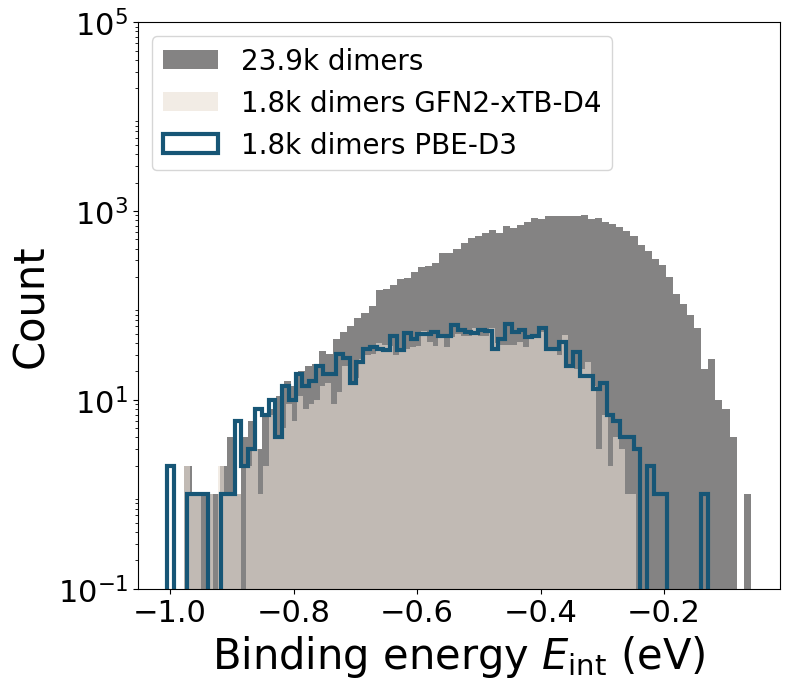

In [103]:
#To get the binding feature distribution of ORCA and xTB
#xTB binding energy distribution 23k vs 1.8k
fig,ax = plt.subplots(figsize=(8,7))
#ax.set_yscale('log')
#ax.set_ylim(1e0,1e4)
ax.hist(X[['eBIND']],bins=80,density=False,alpha=0.5,label='23.9k dimers',color=colors['black'],histtype='stepfilled',log=True,rwidth=1,lw=2) # edgecolor='black'
ax.hist(X.loc[selected_labels,'eBIND'],bins=80,density=False,alpha=0.6,label='1.8k dimers GFN2-xTB-D4',color=colors['white'],rwidth=0.8,lw=2,histtype='stepfilled') #edgecolor='black'
ax.hist(df_dm_orca['eBIND'],bins=80,density=False,alpha=1,label='1.8k dimers PBE-D3',color='red',rwidth=0.8,edgecolor='#175676',lw=3,histtype='step')
ax.set_ylim(1e-1,1e5)
#设置Log刻度数量
ax.yaxis.set_major_locator(plt.LogLocator(base=10.0, numticks=5))
ax.set_xlabel('Binding energy $E_{\mathrm{int}}$ (eV)',fontsize=30)
ax.set_ylabel('Count',fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc='upper left',fontsize=20)
plt.tight_layout()
#plt.savefig('./xTB_distribution.png',dpi=600)
plt.show()

In [68]:
df_cplx.columns

Index(['REC', 'OM', 'DM', 'atNUM', 'atXYZ', 'ePBE+D3', 'eFE', 'eE6', 'eE8',
       'eD3', 'eVBM', 'eCBM', 'eGAP', 'eBE', 'WF', 'zEPOL', 'eEPOL', 'CELL',
       'stCELL', 'pCELL', 'vF', 'vDF', 'baCHG'],
      dtype='object')

## The work function calculation and distribution

/tmp/ipykernel_1576062/1801281457.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  CPLX_Ef = float(df_cplx[(df_cplx['REC']==18) & (df_cplx['OM'] ==35)]['eFE'])
/tmp/ipykernel_1576062/1801281457.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  SUB_Ef = float(df_sub[(df_sub['REC']==18) & (df_sub['OM'] ==35)]['eFE'])


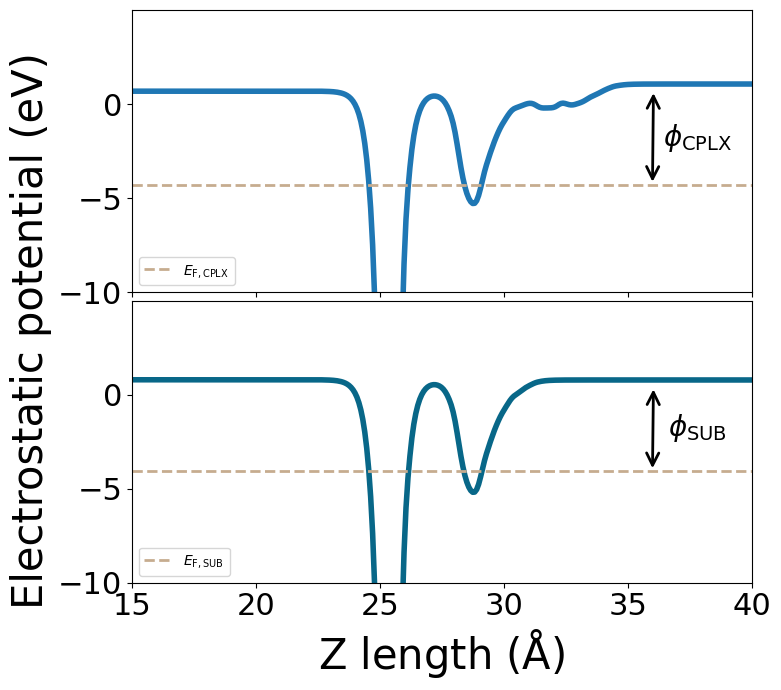

In [88]:
#Work function distribution e.g. 18_rec and 18_om 
CPLX_Ef = float(df_cplx[(df_cplx['REC']==18) & (df_cplx['OM'] ==35)]['eFE'])
SUB_Ef = float(df_sub[(df_sub['REC']==18) & (df_sub['OM'] ==35)]['eFE'])
CPLX_pe = list(df_cplx[(df_cplx['REC']==18) & (df_cplx['OM'] ==35)]['eEPOL'])
CPLX_z = list(df_cplx[(df_cplx['REC']==18) & (df_cplx['OM'] ==35)]['zEPOL'])
#CPLX_pe = [float(i[:-1]) if ']' in i else float(i) for i in CPLX_pe[0].split()[1:]] # get rid of nonsense str
#CPLX_z = [float(i[:-1]) if ']' in i else float(i) for i in CPLX_z[0].split()[1:]] # get rid of nonsense str

SUB_pe = list(df_sub[(df_sub['REC']==18) & (df_sub['OM'] ==35)]['eEPOL'])
SUB_z = list(df_sub[(df_sub['REC']==18) & (df_sub['OM'] ==35)]['zEPOL'])
#SUB_pe = [float(i[:-1]) if ']' in i else float(i) for i in SUB_pe[0].split()[1:]] # get rid of nonsense str
#SUB_z = [float(i[:-1]) if ']' in i else float(i) for i in SUB_z[0].split()[1:]] # get rid of nonsense str and the last ele was 'number]' comparing to Atomic charges
#Plot
ylim=(-10,5)
xlim=(15,40)
yticks=[-10,-5,0]
#---#
fig,ax = plt.subplots(2,1,figsize=(8,7))
ax[0].plot(CPLX_z[0],CPLX_pe[0],lw=4)#color='#086788'
#ax[0].set_ylabel('Electrostatic potential (eV)',fontsize=22)
ax[0].axhline(y=CPLX_Ef,ls='--',lw=2,label='$E_{\mathrm{F},\mathrm{CPLX}}$',color=colors['green'])
ax[0].legend(loc='lower left')
ax[0].set_xlim(xlim)
ax[0].set_ylim(ylim)
ax[0].set_yticks(yticks)
ax[0].set_xticklabels([])
ax[0].tick_params(axis='y', which='major', labelsize=22)

#arrow
ax[0].annotate(' ', 
             xy=(36,CPLX_Ef),
             xytext=(35.85,1.2),
             arrowprops=dict(arrowstyle='<->',lw=2),
             fontsize=22)

ax[0].text(39.2,(CPLX_Ef+0.7)/2,'$\phi_{\mathrm{CPLX}}$',ha='right',va='center',fontsize=20)
#ax[0].plot(CPLX_pe[[CPLX_pe['']]])


#ax[1]
ax[1].set_xlim(xlim)
ax[1].plot(SUB_z[0],SUB_pe[0],lw=4,color='#086788',ls='-') #label='SUB'
ax[1].set_xlabel('Z length ($\mathrm{\AA}$)',fontsize=30)
ax[1].axhline(y=SUB_Ef,ls='--',lw=2,label='$E_{\mathrm{F},\mathrm{SUB}}$',color=colors['green'])
ax[1].set_ylim(ylim)
ax[1].set_yticks(yticks)
ax[1].annotate(' ', 
             xy=(36,SUB_Ef),
             xytext=(35.85,0.9),
             arrowprops=dict(arrowstyle='<->',lw=2),
             fontsize=22)

ax[1].text(39,(CPLX_Ef+0.7)/2,'$\phi_{\mathrm{SUB}}$',ha='right',va='center',fontsize=20)
ax[1].tick_params(axis='both', which='major', labelsize=22)


fig.supylabel('Electrostatic potential (eV)', fontsize=30,x=0.03,y=0.52)
plt.legend(loc='lower left')
plt.tight_layout()
plt.subplots_adjust(hspace=0.03)
#plt.savefig('./PE_WF.png',dpi=600,transparent=True)
plt.show()

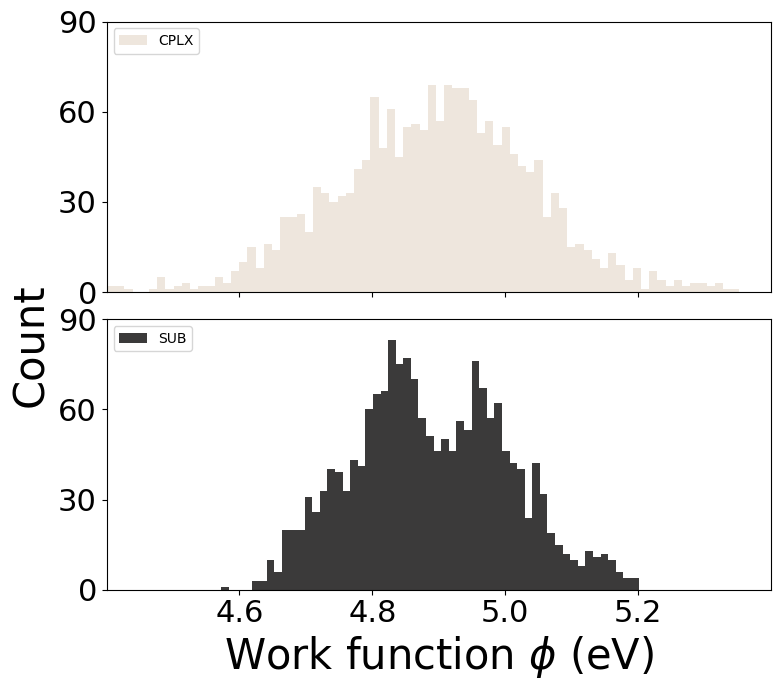

In [90]:
#Work function distribution for CPLX and SUB systems
CPLX_WF = df_cplx['WF']
SUB_WF = df_sub['WF']
fig,ax = plt.subplots(2,1,figsize=(8,7))
ax[0].hist(CPLX_WF,bins=100,density=False,alpha=0.8,label='CPLX',color=colors['white'])
ax[0].set_xticks([4.6,4.8,5.0,5.2])
ax[0].set_xlim(4.4,5.4)
#ax[0].set_xticklabels([])
ax[0].set_yticks([0,30,60,90])
ax[0].legend(loc='upper left')
ax[0].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)  # 隐藏刻度标签但保留刻度
ax[0].tick_params(axis='y', which='major', labelsize=22)
#second
ax[1].hist(SUB_WF,bins=55,density=False,alpha=0.8,label='SUB',color=colors['black'])
#ax[1].hist(CPLX_WF,bins=100,density=False,alpha=0.2,label='CPLX',color=colors['white'])
ax[1].set_xticks([4.6,4.8,5.0,5.2])
ax[1].set_xlim(4.4,5.4)
ax[1].set_yticks([0,30,60,90])
ax[1].legend(loc='upper left')
ax[1].tick_params(axis='both', which='major', labelsize=22)

#For the whole
fig.supylabel('Count', fontsize=30,x=0.03) # super ylabel to set unified ylabel
#plt.subplots_adjust(hspace=0)
plt.xlabel('Work function $\phi$ (eV)',fontsize=30)
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
#plt.legend(loc='upper left')
#plt.savefig('.WF_value_count.png',dpi=300)
plt.show()

## The receptor atomic charges comparsion in CPLX and SUB systems

In [129]:
#Get all receptor Bader charges 
CPLX_bc = df_cplx['baCHG'].copy()
SUB_bc = df_sub['baCHG'].copy()
CPLX_bc_all = []
SUB_bc_all = []
for i in tqdm(range(1,len(SUB_bc)+1)):
    l_sub = len(SUB_bc[i])    
    n_rec = len(SUB_bc[200:])
    CPLX_bc_all.append(CPLX_bc[i][200:l_sub])
    SUB_bc_all.append(SUB_bc[i][200:])
#Get all receptor atom numbers
CPLX_atn = df_cplx['atNUM'].copy()
SUB_atn = df_sub['atNUM'].copy()
CPLX_atn_all = []
SUB_atn_all = []
for i in tqdm(range(1,len(SUB_atn)+1)):
    l_sub = len(SUB_atn[i])    
    n_rec = len(SUB_atn[200:])
    CPLX_atn_all.append(CPLX_atn[i][200:l_sub])
    SUB_atn_all.append(SUB_atn[i][200:])
#Map Atom numbers to charges
CPLX_bc_flat = [float(j) for i in CPLX_bc_all for j in i]
SUB_bc_flat = [float(j) for i in SUB_bc_all for j in i]
CPLX_atn_flat = [float(j) for i in CPLX_atn_all for j in i]
SUB_atn_flat = [float(j) for i in SUB_atn_all for j in i]
# create dataFrame
df_baCHG_rec = pd.DataFrame([CPLX_atn_flat,CPLX_bc_flat,SUB_bc_flat]).T

100%|██████████| 1836/1836 [00:00<00:00, 36343.97it/s]
/tmp/ipykernel_1576062/2094030118.py:28: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_baCHG_rec.colmuns = ['atNUM','CPLX_bc','SUB_bc']


In [133]:
df_baCHG_rec[[0]]

,0
0,6.0
1,6.0
2,6.0
3,6.0
4,8.0
...,...
124945,1.0
124946,1.0
124947,1.0
124948,1.0


In [147]:
#define plot function for charges
def get_q_at_plt(df,ele=6.0,clr=colors['black'],lim=(-0.1,0.1),nbins=1):
    y = df[df[0]==ele][[1]].astype(float).values
    x = df[df[0]==ele][[2]].astype(float).values
    #print(y)
    #plot density scatter 
    fig,ax = plt.subplots(figsize=(8,7))
    #normalize cb by logarithm
    #norm = mcolors.LogNorm(vmin=z.min(),vmax=z.max())
    scatter = ax.scatter(x,y,s=100,color=clr,alpha=0.8,edgecolor='cyan') #c=z_sorted,,norm = norm, cmap='YlOrRd'
    ax.plot(range(-30,30),range(-30,30),lw=3,alpha=0.2)
    # calculate point density #
    #xy = np.vstack([CPLX_bc_flat,SUB_bc_flat])
    #ax.set_ylabel('CPLX Rec. atomic charge ($e^-$)',fontsize=30)
    #ax.set_xlabel('SUB Rec. atomic charge ($e^-$)',fontsize=20)
    ax.set_ylim(lim)
    ax.set_xlim(lim)
    #ax.set_yticks([-0.1,-0.05,0,0.05,0.1])
    #ax.set_xticks([-0.1,-0.05,0,0.05,0.1])
    # 自动设置x,y轴个数
    ax.xaxis.set_major_locator(MaxNLocator(nbins=nbins))  # x轴最多显示4个刻度
    ax.yaxis.set_major_locator(MaxNLocator(nbins=nbins))
    #ax.xaxis.set_visible(False)
    # 设置坐标轴字体大小
    ax.tick_params(axis='both', which='major', labelsize=42)

    #colorbar
    #cb = plt.colorbar(scatter,extend='max')
    #cb.set_label('Point density',fontsize=20,loc='center',labelpad=10)
    #cb.ax.tick_params(labelsize=20)
    #scatter.set_clim(1e-2,1e3)
    #cb.set_ticks([])

    #plt.legend(loc='upper left')
    plt.tight_layout()
    #plt.savefig(f'../Dataset/BC_rec_{ele}.png',dpi=600)
    plt.show()

[[ 0.000639]
 [-0.032874]
 [ 0.396822]
 ...
 [-0.01497 ]
 [-0.045113]
 [-0.012319]]


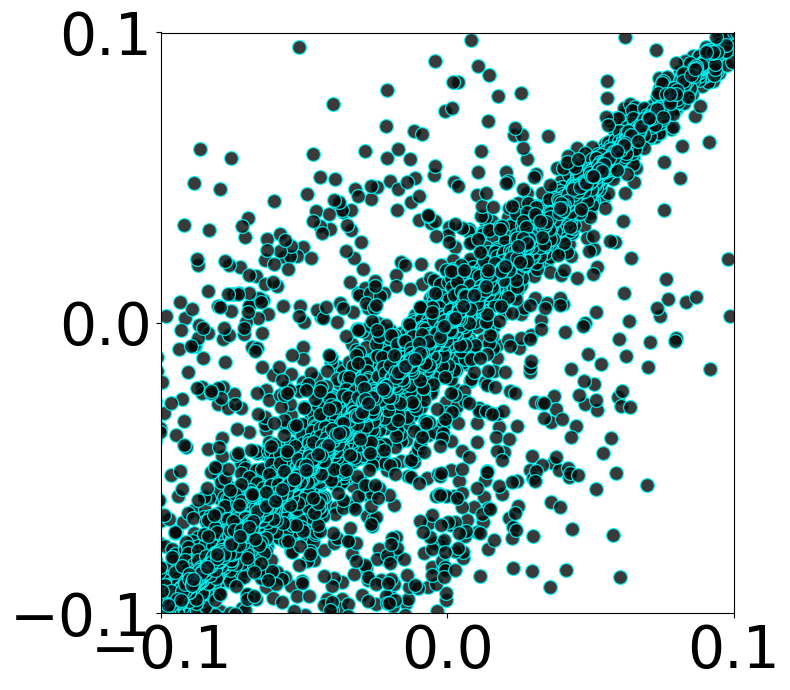

In [145]:
#Atomic charges for CARBON atom of the receptors
get_q_at_plt(df=df_baCHG_rec,ele=6.0)

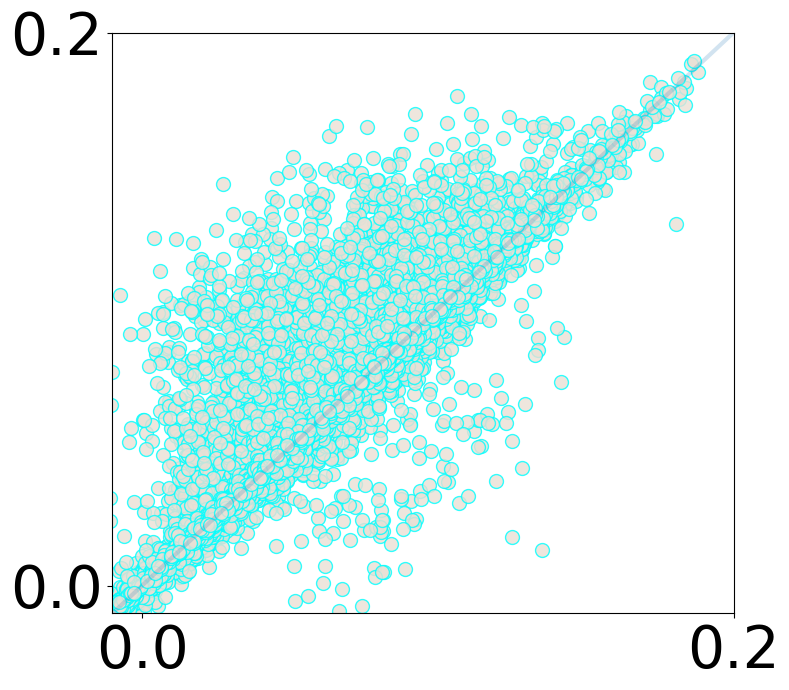

In [148]:
#Atomic charges for Hydrogen atom of the receptors
get_q_at_plt(df=df_baCHG_rec,ele=1.0,clr=colors['white'],lim=(-0.01,0.2))

## Binding feature scattering

/tmp/ipykernel_1576062/288575239.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


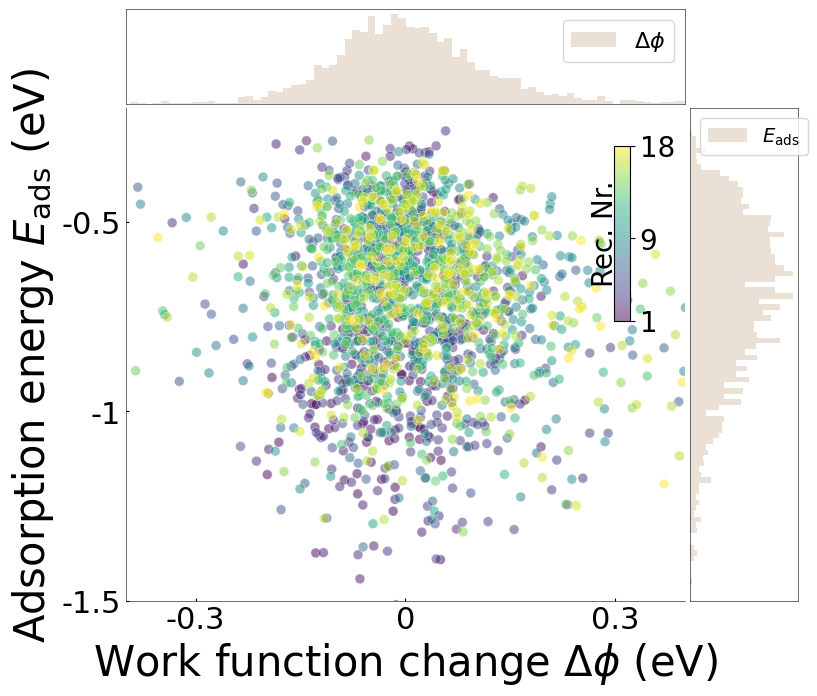

In [97]:
# Adsorption vs work function change
#set regions 
fig = plt.figure(figsize=(8,7))
plt.subplots_adjust(left=0.14,bottom=0.15,right=0.98,top=0.995)
grid = plt.GridSpec(6,6,wspace=0.05,hspace=0.05)
ylim=(-1.5,-0.2)
xlim=(-0.4,0.4)

#x distribution
ax1 = plt.subplot(grid[0,0:5])
#sns.kdeplot(data=df_tot['D_wf'],x=df_tot['D_wf'],hue=None,fill=True,palette=current_palette,alpha=0.5,linewidth=0.5,ax=ax1)
ax1.hist(df_bd['DWF'],bins=100,density=False,alpha=1,label='$\phi$',color=colors['white'])

ax1.spines[:].set_linewidth(0.4) # set linewidth for x axis
ax1.tick_params(width=0.6,length=2.5,labelsize=22) # set 

ax1.set_xlim(xlim)

ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel('')
ax1.legend(['$\Delta \phi$'],loc='upper right',fontsize=16)

# y distribution
ax2 = plt.subplot(grid[1:6,5])
#sns.kdeplot(data=df_tot['Eads'],y=df_tot['Eads'],hue=None,fill=True,palette=current_palette,alpha=0.5,linewidth=0.5,ax=ax2)
ax2.hist(df_bd['eADS'],bins=100,density=False,alpha=1,label='$E_{\mathrm{ads}}$',color=colors['white'],orientation='horizontal')
ax2.set_ylim(ylim)

ax2.spines[:].set_linewidth(0.4) # set linewidth for x axis
ax2.tick_params(width=0.6,length=2.5,labelsize=22) # set 
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_xlabel('')
ax2.legend(['$E_{\mathrm{ads}}$'],loc='upper left',fontsize=14)


# set for scattering
ax3 = plt.subplot(grid[1:6,0:5])
ax3.spines[:].set_linewidth(0.4)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.tick_params(length=2,direction='in',labelsize=8)
scatter = ax3.scatter(x=df_bd['DWF'],y=df_bd['eADS'],s=50,alpha=0.5,marker='o',c=df_bd['REC'],edgecolor='w',linewidth=0.5) #,vmin=1,vmax=18
ax3.set_xlabel('Work function change $\Delta \phi$ (eV)',fontsize=30)
ax3.set_ylabel('Adsorption energy $E_{\mathrm{ads}}$ (eV)',fontsize=30)
ax3.set_xticks([-0.6,-0.3,0,0.3,0.6])
ax3.set_yticks([-1.5,-1,-0.5,0])
ax3.set_xticklabels([-0.6,-0.3,0,0.3,0.6],fontsize=22)
ax3.set_yticklabels([-1.5,-1,-0.5,0],fontsize=22)
ax3.set_ylim(ylim)
ax3.set_xlim(xlim)

#colorbar
cb_ax3 = fig.add_axes([0.75,0.55,0.02,0.25])
cb = plt.colorbar(scatter,cax=cb_ax3)
cb.set_label('Rec. Nr.',fontsize=20,loc='center',labelpad=-60)
cb.ax.tick_params(labelsize=20)
cb.set_ticks([1,9,18])
plt.tight_layout()
#plt.savefig('./Eads_WF.png',dpi=600)

/tmp/ipykernel_1576062/3663689509.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


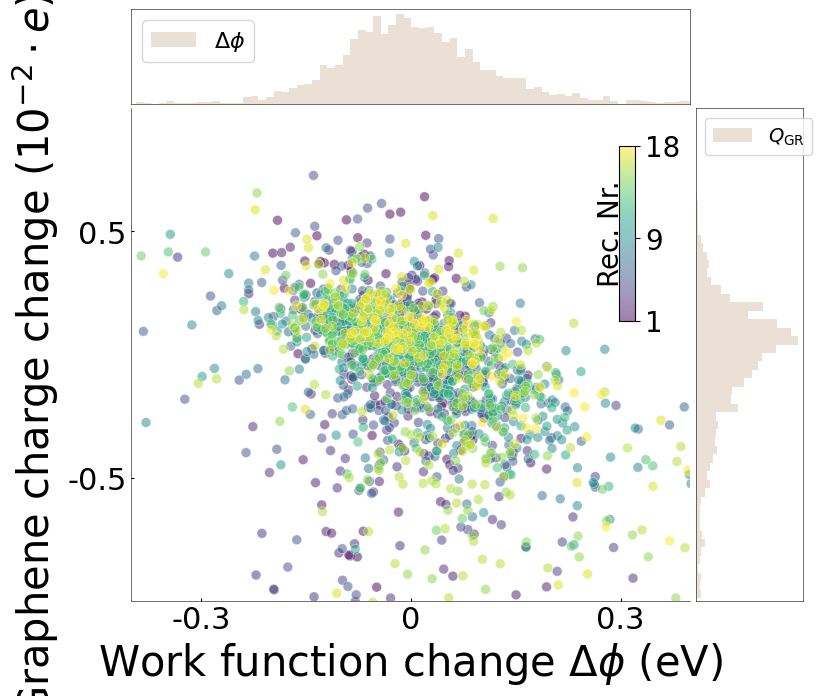

In [100]:
#Work function vs Charge change graphene
fig = plt.figure(figsize=(8,7))
plt.subplots_adjust(left=0.14,bottom=0.15,right=0.98,top=0.995)
grid = plt.GridSpec(6,6,wspace=0.05,hspace=0.05)
ylim=(-1,1)
xlim=(-0.4,0.4)

# x distribution
ax1 = plt.subplot(grid[0,0:5])
#sns.kdeplot(data=df_tot['Eads'],y=df_tot['Eads'],hue=None,fill=True,palette=current_palette,alpha=0.5,linewidth=0.5,ax=ax2)
ax1.hist(df_bd['DWF'],bins=100,density=False,alpha=1,label='$\Delta \phi$',color=colors['white'],orientation='vertical')

ax1.spines[:].set_linewidth(0.4) # set linewidth for x axis
ax1.tick_params(width=0.6,length=2.5,labelsize=22) # set 
#ax1.set_ylim(-0.6,0.6)
ax1.set_yticks([])
ax1.set_xticks([])
ax1.set_xlabel('')
ax1.legend(['$\Delta \phi$'],loc='upper left',fontsize=16)
ax1.set_xlim(xlim)


#y distribution
ax2 = plt.subplot(grid[1:6,5])
ax2.hist(df_bd['GbaDCHG']*100,bins=100,density=False,alpha=1,label='$\phi$',color=colors['white'],orientation='horizontal')
ax2.spines[:].set_linewidth(0.4) # set linewidth for x axis
ax2.tick_params(width=0.6,length=2.5,labelsize=20) # set 
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_ylabel('')
ax2.legend(['$Q_{\mathrm{GR}}$'],loc='upper left',fontsize=14,)
ax2.set_ylim(ylim)


# set for scattering
ax3 = plt.subplot(grid[1:6,0:5])
ax3.spines[:].set_linewidth(0.4)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.tick_params(length=2,direction='in',labelsize=8)
scatter = ax3.scatter(y=df_bd['GbaDCHG']*100,x=df_bd['DWF'],s=50,alpha=0.5,marker='o',c=df_bd['REC'],edgecolor='w',linewidth=0.5,) #,vmin=1,vmax=18
ax3.set_ylabel(r'Graphene charge change $\left(10^{-2} \cdot e \right)$',fontsize=30)
ax3.set_xlabel('Work function change $\Delta \phi$ (eV)',fontsize=30)
ax3.set_yticks([-2.5,-1.5,-0.5,0.5])
ax3.set_xticks([-0.6,-0.3,0,0.3,0.6])
ax3.set_yticklabels([-2.5,-1.5,-0.5,0.5],fontsize=22)
ax3.set_xticklabels([-0.6,-0.3,0,0.3,0.6],fontsize=22)
ax3.set_ylim(ylim)
ax3.set_xlim(xlim)


#colorbar
cb_ax3 = fig.add_axes([0.75,0.55,0.02,0.25])
cb = plt.colorbar(scatter,cax=cb_ax3)
cb.set_label('Rec. Nr.',fontsize=20,loc='center',labelpad=-60)
cb.ax.tick_params(labelsize=20)
cb.set_ticks([1,9,18])

plt.tight_layout()
#plt.savefig('./Dataset/Q_gra_WF.png',dpi=600)

# Some other examples to use MORE-Q

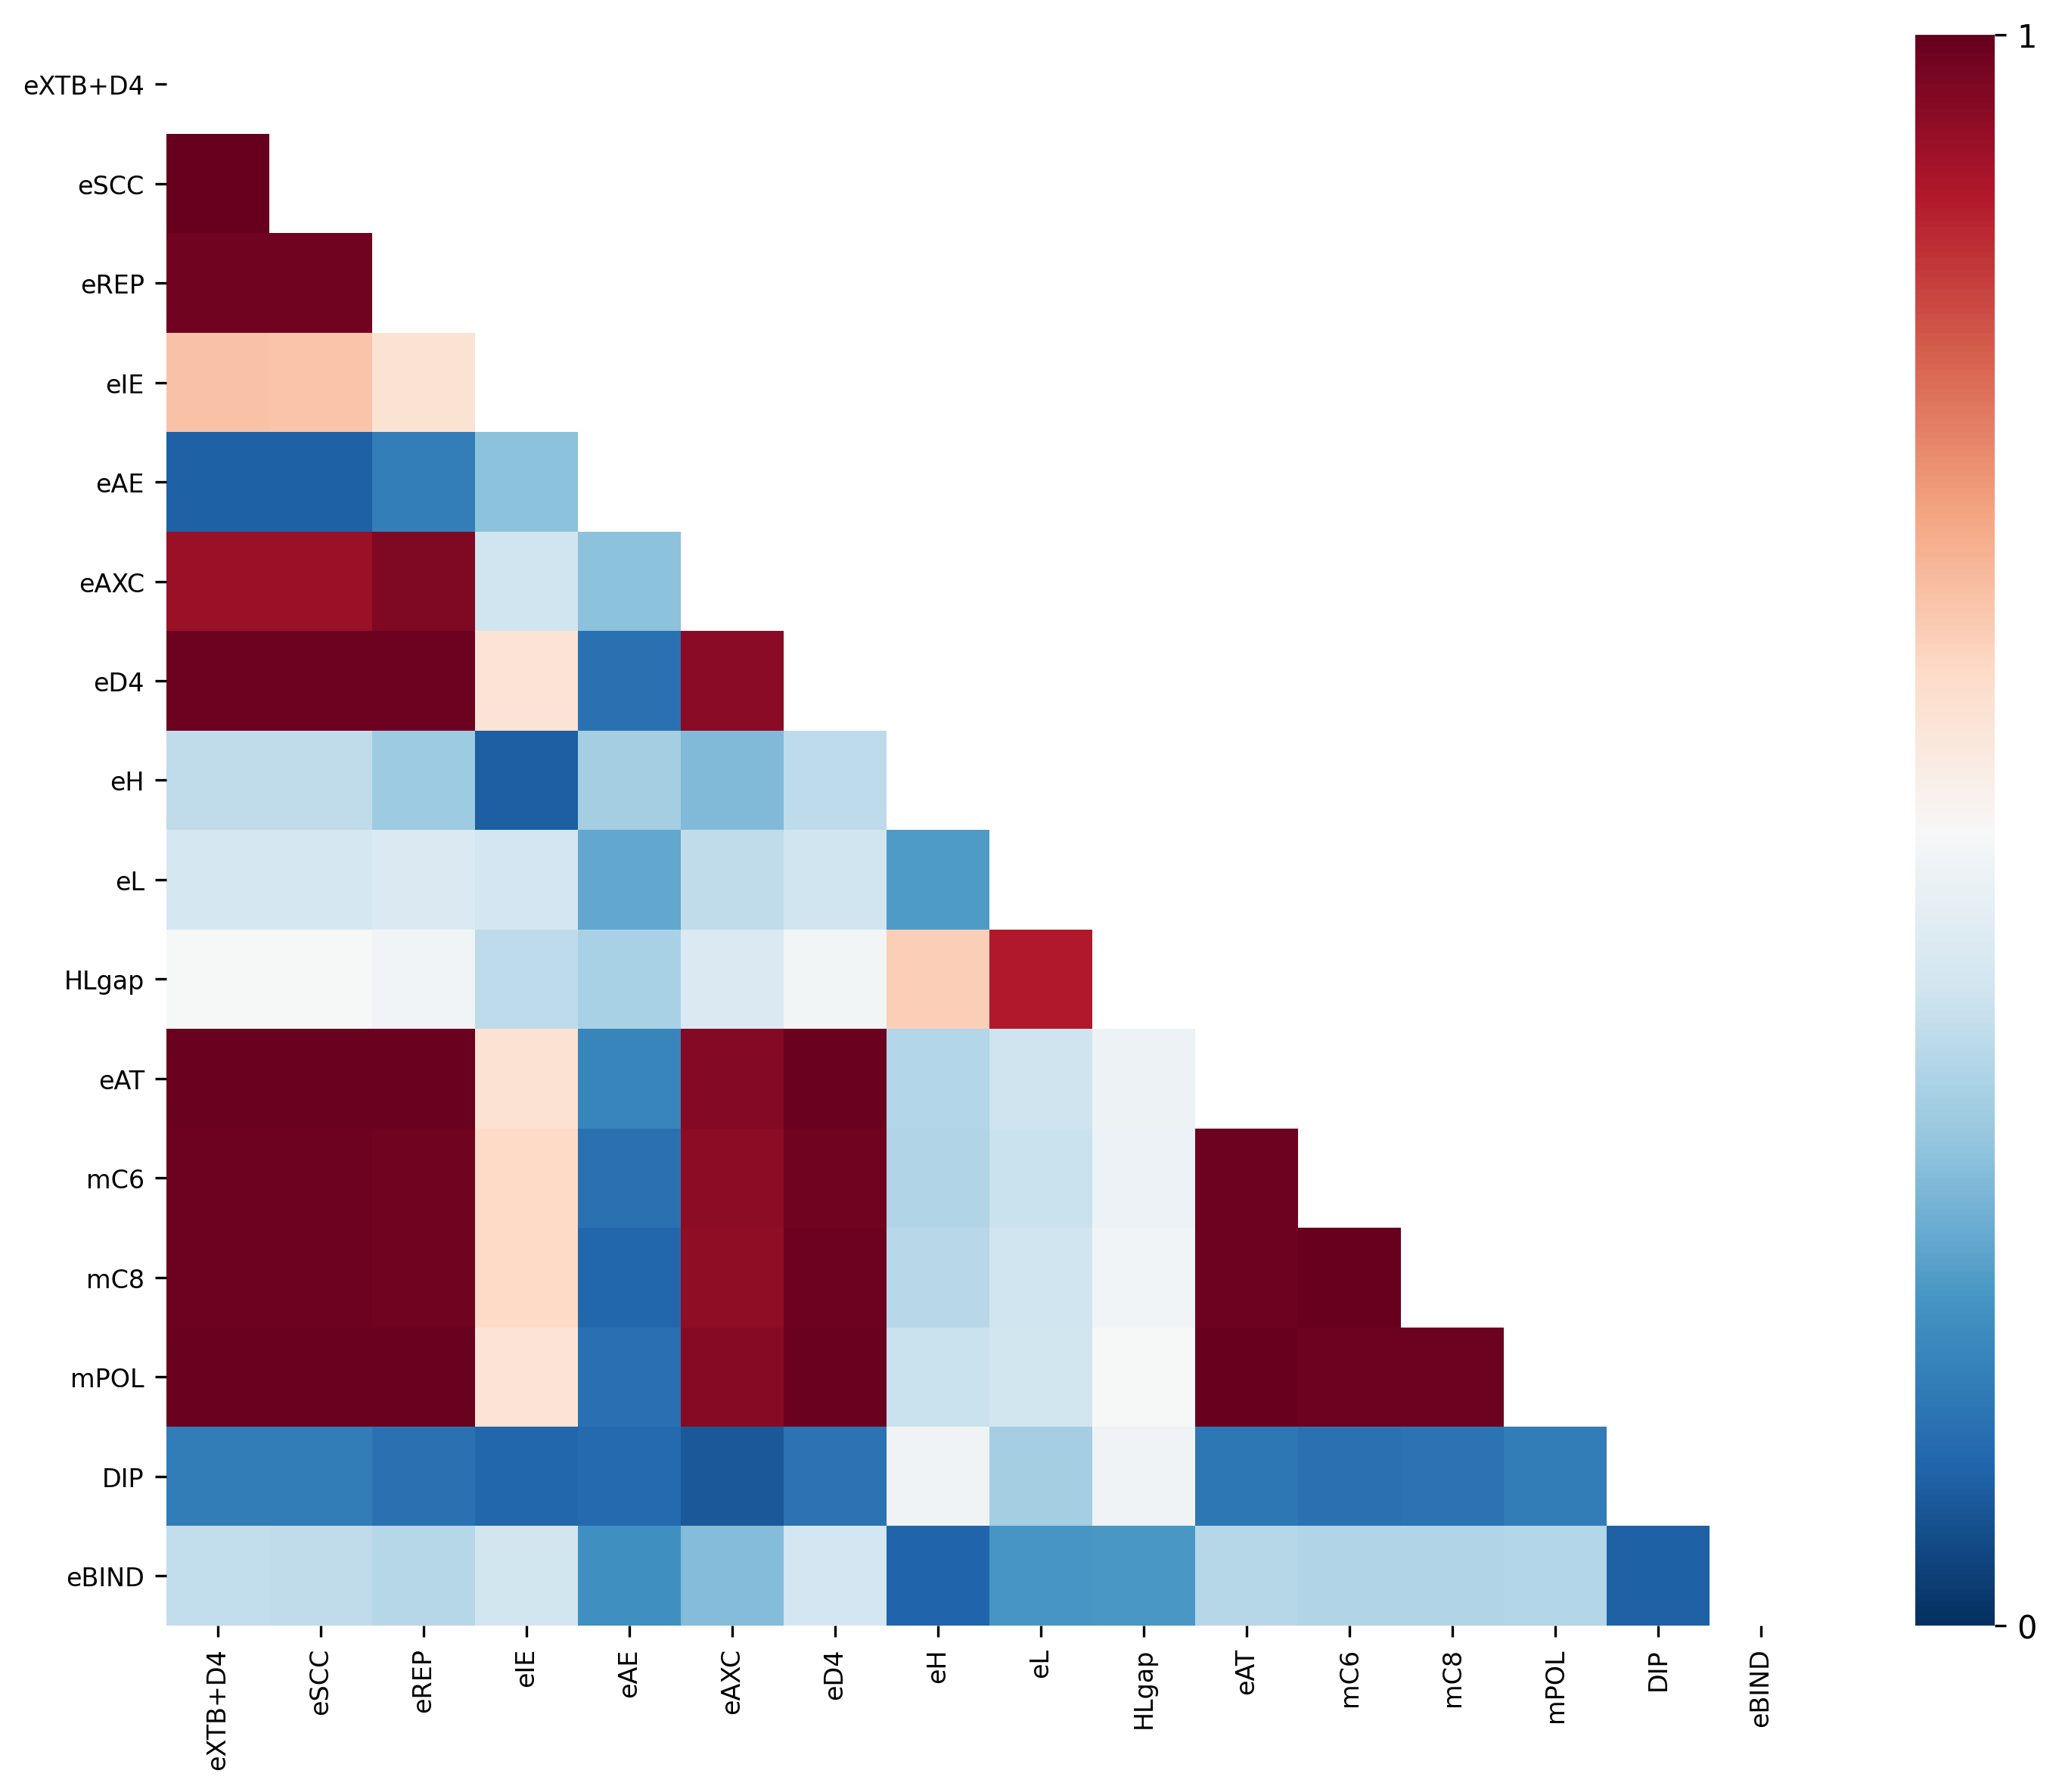

In [149]:
#To get the pearson correlation between dimer properties
def get_pearson(X,tri=True):
    #
    scaler_1 = StandardScaler()
    X_std = scaler_1.fit_transform(X)
    
    fig = plt.figure(figsize=(10,8),dpi=300)
    ax = fig.add_subplot()
    correlation = pd.DataFrame(X_std).corr(method='pearson')
    
    #make a down triangle mask heatmap 
    if tri == True:   
        mask=np.zeros_like(correlation,dtype=bool)
        mask[np.triu_indices_from(mask)]=True
    else:
        mask=None
    ax = sns.heatmap(np.abs(correlation),mask=mask,cmap="RdBu_r",cbar_kws={'ticks':[0,1]},vmin=0,vmax=1,xticklabels=1,yticklabels=1) 
    ax.set_xticklabels(X.columns,fontsize=8)
    ax.set_yticklabels(X.columns,fontsize=8)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    return correlation
X = df_dm_xtb[xtb_labels]
corr = get_pearson(X,tri=True)

#
For more potential application of MORE-Q, please refer to the manuscript doi: